<a href="https://colab.research.google.com/github/zxcasd945/Pytorchcolab/blob/main/04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from pathlib import Path
import requests
import zipfile

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path}directory exists.')
else:
  print(f'Did not find{image_path}, create one.')
  image_path.mkdir(parents=True, exist_ok=True)

with open (data_path/'pizza_steak_sushi.zip', 'wb') as f:
  request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('Downloading pizza, steak, sushi data...')
  f.write(request.content)
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print('Unzipping pizza, steak, sushi data...')
  zip_ref.extractall(image_path)

import os
def walk_through_dir(dir_path):
 for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)


data/pizza_steak_sushidirectory exists.
Unzipping pizza, steak, sushi data...
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [45]:
import random
from PIL import Image



# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
random_image_path
img = Image.open(random_image_path)
image_class = random_image_path.parent.stem
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height, width: {img.height},{img.width}")


Random image path: data/pizza_steak_sushi/train/pizza/68684.jpg
Image class: pizza
Image height, width: 384,512


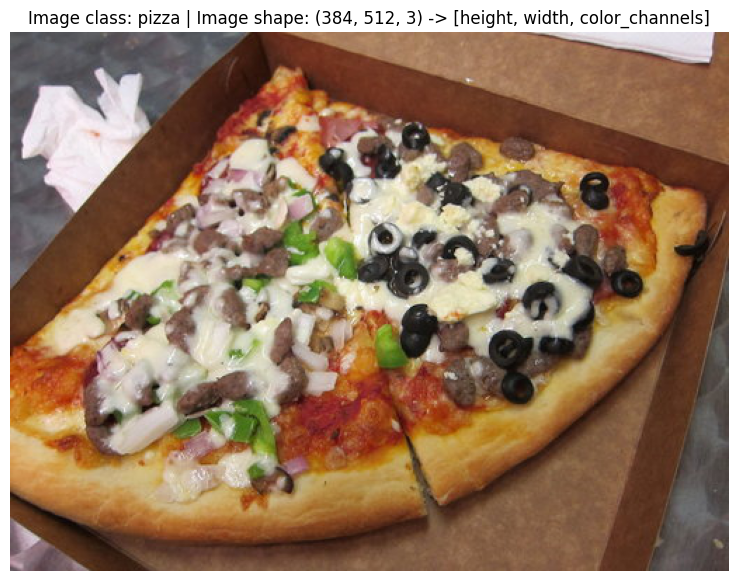

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

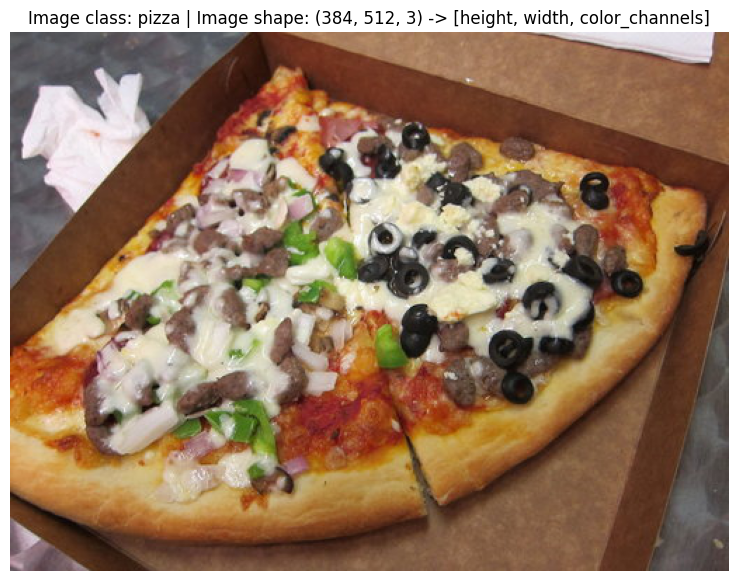

In [47]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);


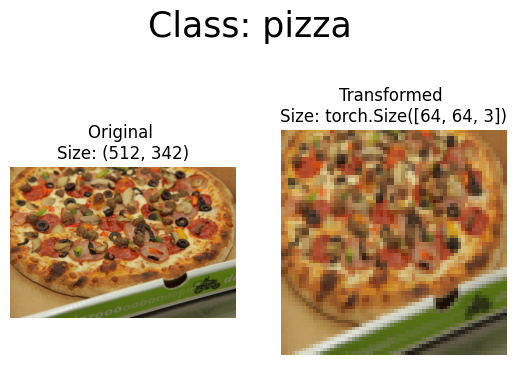

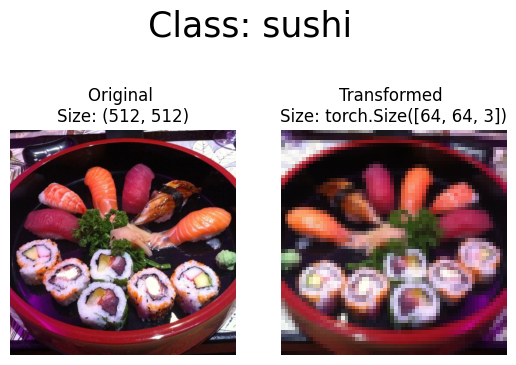

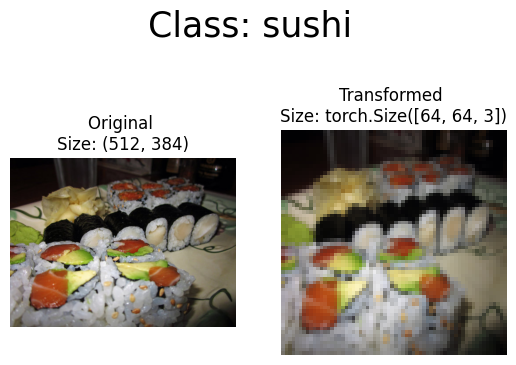

In [48]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)

            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=25)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)



In [49]:
train_dir= image_path/'train'
test_dir= image_path/'test'


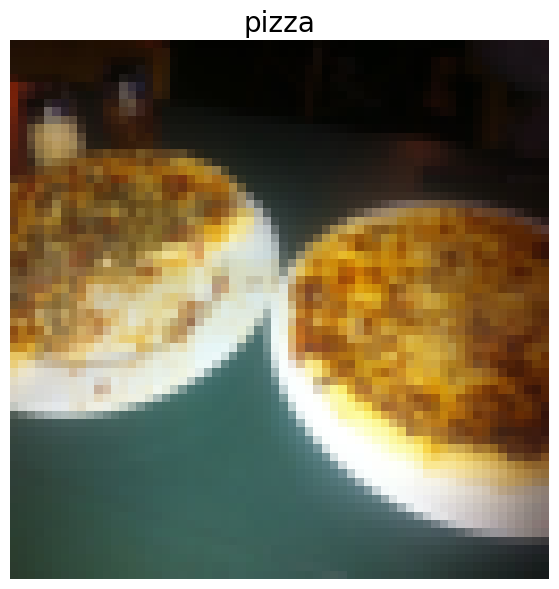

In [50]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                                transform=data_transform,
                                target_transform=None)
img, label=train_data[0][0], train_data[0][1]
class_names = train_data.classes
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis(False);
plt.title(class_names[label], fontsize=20);

In [51]:
from torch.utils.data import DataLoader
import os
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=os.cpu_count(),
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=os.cpu_count(),
                            shuffle=False)
next(iter(train_dataloader))[0]

tensor([[[[0.0196, 0.0196, 0.0196,  ..., 0.3294, 0.3647, 0.3882],
          [0.0196, 0.0196, 0.0235,  ..., 0.3098, 0.3373, 0.3725],
          [0.0392, 0.0431, 0.0471,  ..., 0.3098, 0.3294, 0.3569],
          ...,
          [0.0235, 0.0196, 0.0235,  ..., 0.1490, 0.1569, 0.1608],
          [0.0039, 0.0039, 0.0039,  ..., 0.1373, 0.1569, 0.1490],
          [0.0353, 0.0275, 0.0314,  ..., 0.1373, 0.1490, 0.1451]],

         [[0.0118, 0.0118, 0.0118,  ..., 0.1843, 0.2039, 0.2275],
          [0.0039, 0.0039, 0.0039,  ..., 0.1647, 0.1804, 0.2078],
          [0.0196, 0.0196, 0.0196,  ..., 0.1608, 0.1765, 0.1961],
          ...,
          [0.0157, 0.0118, 0.0157,  ..., 0.0667, 0.0667, 0.0667],
          [0.0039, 0.0039, 0.0039,  ..., 0.0588, 0.0706, 0.0627],
          [0.0196, 0.0118, 0.0118,  ..., 0.0549, 0.0667, 0.0627]],

         [[0.0235, 0.0235, 0.0235,  ..., 0.1608, 0.1843, 0.2000],
          [0.0196, 0.0196, 0.0196,  ..., 0.1529, 0.1725, 0.1882],
          [0.0314, 0.0314, 0.0314,  ..., 0

In [52]:
class_names_found =[]
for entry in (os.scandir(train_dir)):
  class_names_found.append(entry.name)
print(sorted(class_names_found))

class_names_found = sorted([entry.name for entry in list(os.scandir(train_dir))])

class_dict={}
for indexes, classes in list(enumerate(class_names_found)):
  class_dict[classes]=indexes

class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

['pizza', 'steak', 'sushi']


In [53]:


def find_classes(directory: str):
  classes =[]
  for entry in os.scandir(directory):
    classes.append(entry.name)
  class_to_idx={}
  for indexes, labels in enumerate(classes):
    class_to_idx[labels]=indexes
  return classes , class_to_idx
find_classes(train_dir)

(['sushi', 'steak', 'pizza'], {'sushi': 0, 'steak': 1, 'pizza': 2})

In [54]:
from operator import getitem
from torchvision import transforms
from PIL import Image
import pathlib
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir, transform=None):
    self.paths=list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transform=transform
    self.classes, self.class_to_idx= find_classes(targ_dir)
  def load_image(self, index):
    image_path=self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self, index):
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom.class_to_idx

{'sushi': 0, 'steak': 1, 'pizza': 2}

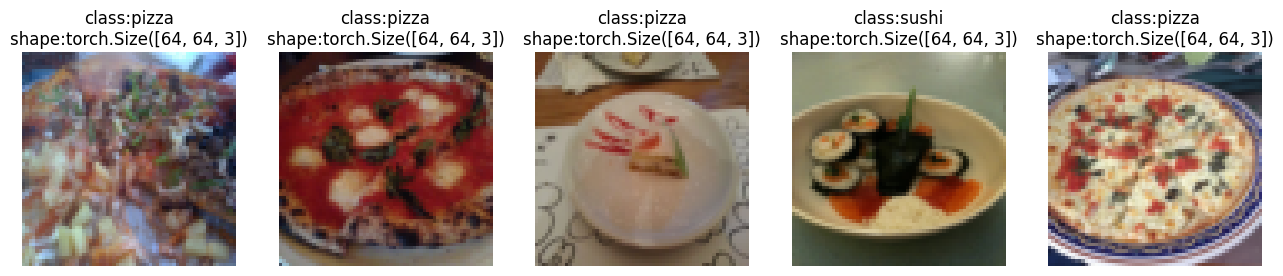

In [55]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes:list[input] = None,
                          n: int = 10,
                          display_shape: bool=True,
                          seed: int = None):
  if n>10:
    n=10
    print('n shoud be lessor or equal to 10')
  if seed:
    random.seed(seed)
  random_image_idx=random.sample(range(len(dataset)),k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_image_idx):
    targ_image, targ_label= dataset[targ_sample][0],dataset[targ_sample][1]
    targ_image_adjust=targ_image.permute(1,2,0)
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title=f'class:{classes[targ_label]}'
      if display_shape:
        title=title+f'\nshape:{targ_image_adjust.shape}'
    plt.title(title)
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)


In [56]:
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=1,
                                   num_workers=0,
                                   shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom,
                                   batch_size=1,
                                   num_workers=0,
                                   shuffle=False)
img_custom, label_custom= next(iter(train_dataloader_custom))


In [82]:
simple_transform=transforms.Compose([transforms.Resize((64,64)),
                                     transforms.ToTensor()])
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_simple=DataLoader(train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,
                                   num_workers=NUM_WORKERS)
test_dataloader_simple=DataLoader(test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)
class TinyVGG(nn.Module):
  def __init__(self, input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )
  def forward(self, x):
      x=self.conv_block_1(x)
      x=self.conv_block_2(x)
      #print(x.shape)
      x=self.classifier(x)
      #print(x.shape)
      return x


In [61]:
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)


In [59]:
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single, lable_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_batch.to(device))

RuntimeError: ignored

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class ==y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc


def test_step(model, dataloader, loss_fn):
  model.eval()
  test_loss, test_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    test_pred_logits = model(X)
    loss = loss_fn(test_pred_logits, y)
    test_loss += loss.item()

    test_pred_labels = test_pred_logits.argmax(dim=1)
    test_acc += (test_pred_labels ==y).sum().item()/len(test_pred_labels)

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results



In [ ]:
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

custom_image = custom_image_uint8.type(torch.float32)
custom_image.shape

In [83]:
custom_image=custom_image_uint8.type(torch.float32)
custom_image = custom_image/255
custom_image_transform = transforms.Compose([transforms.Resize((64,64))])
custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

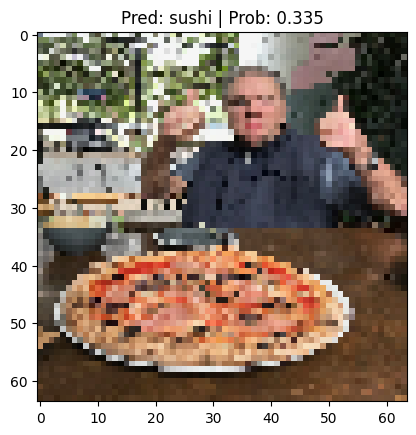

In [102]:
model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))
#logits to probs

custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)

#probs to label

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

custom_image_pred_class = class_names[custom_image_pred_label.cpu()]

plt.imshow(custom_image_transformed.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib


title = f"Pred: {class_names[custom_image_pred_label.cpu()]} | Prob: {custom_image_pred_probs.max().cpu():.3f}"


plt.title(title);